# 1. 드라이브 마운트

In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. 환경 셋팅

In [2]:
# 내 구글 드라이브로 이동
%cd "/content/drive/MyDrive"

# Yolov5 github 레포지토리 clone
!git clone https://github.com/ultralytics/yolov5.git

# 필요한 모듈 설치
%cd yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 12897, done.
remote: Total 12897 (delta 0), reused 0 (delta 0), pack-reused 12897
Receiving objects: 100% (12897/12897), 11.85 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (8961/8961), done.
/content/drive/MyDrive/yolov5
     |████████████████████████████████| 596 kB 15.0 MB/s 


In [3]:
# 런타임 유형변경 -> GPU!
import torch

#파이토치 버전 확인, cuda device properties 확인
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [4]:
# datasets 파일을 드라이브에 넣어주세요~! / train_data.zip 압축풀기
!unzip -q /content/drive/MyDrive/datasets/train_data.zip -d ../

# 3. 학습하기

In [5]:
# ../ = /content/drive/MyDrive/
!python ../yolov5/train.py --img 640 --batch 16 --epochs 300 --data ../datasets/data.yaml --weights yolov5x.pt --name result_roof --cfg ../yolov5/models/yolov5x.yaml

train: weights=yolov5x.pt, cfg=../yolov5/models/yolov5x.yaml, data=../datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result_roof, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

# 4. 모델 저장하기

In [6]:
# 드라이브에 models 폴더 만들고, 이 코드 실행해서 학습시킨 모델을 빼오자!
# 모델 저장하는 코드
!cp -r ../yolov5/runs/train/result_roof /content/drive/MyDrive/models

# 5. 테스트용 사진으로 결과확인하기

In [9]:
# detect.py 실행해보자
!python ../yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/result_roof/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/datasets/test.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/result_roof/weights/best.pt'], source=/content/drive/MyDrive/datasets/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/drive/MyDrive/datasets/test.jpg: 640x640 6 dgs, 5 lgs, Done. (0.093s)
Speed: 0.8ms pre-process, 93.3ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


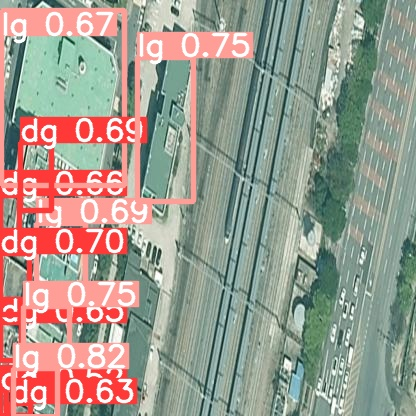

In [10]:
# 테스트용 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp/test.jpg')
cv2_imshow(img)